In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sea
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
import random
import time

import warnings
warnings.filterwarnings('ignore')

In [126]:
data = pd.read_csv('/Users/ankusmanish/Desktop/Desktop/Training/Datasets/Week 12/Mall_Customers.csv')

In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [128]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [129]:
data.drop(['CustomerID','Genre', 'Age'], axis = 1, inplace = True)

In [130]:
data.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


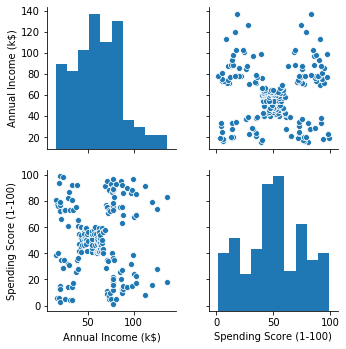

In [131]:
sea.pairplot(data)

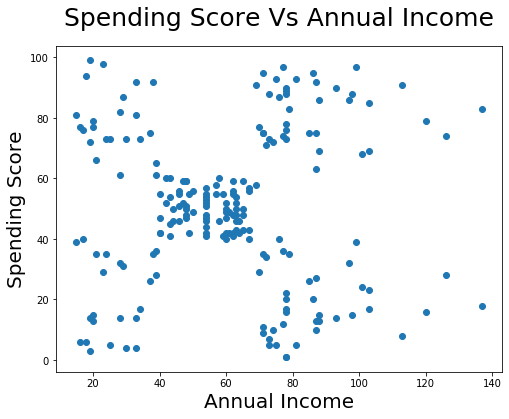

In [132]:
plt.figure(figsize = (8,6))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'])
plt.xlabel('Annual Income', fontsize = 20)
plt.ylabel('Spending Score', fontsize = 20)
plt.title('Spending Score Vs Annual Income', fontsize = 25, pad = 20)
plt.show()

In [120]:
normalized_data = normalize(data)

In [121]:
data = pd.DataFrame(normalized_data, columns = data.columns)

In [122]:
data.head()

,Annual Income (k$),Spending Score (1-100)
0,0.358979,0.933346
1,0.182089,0.983282
2,0.936329,0.351123
3,0.203446,0.979086
4,0.391141,0.920331


## Finding k Value

Total time taken : 0.5282371044158936


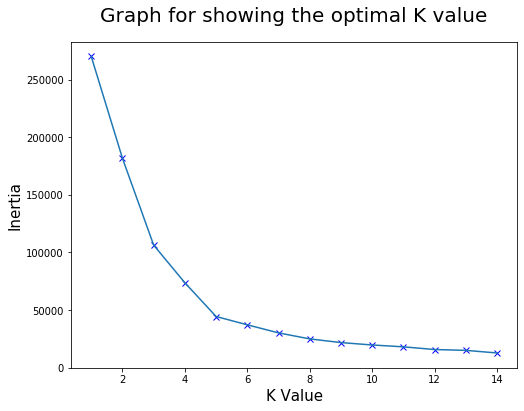

In [72]:
start_time = time.time()
SSD = []

for i in range(1,15):
    clf = KMeans(n_clusters = i)
    clf.fit(data)
    SSD.append(clf.inertia_)
print('Total time taken : {}'.format(time.time() - start_time))

plt.figure(figsize = (8,6))
plt.plot(range(1,15), SSD, 'bx')
plt.plot(range(1,15), SSD)
plt.xlabel('K Value', fontsize = 15)
plt.ylabel('Inertia', fontsize = 15)
plt.title('Graph for showing the optimal K value', fontsize = 20, pad = 20)
plt.show()

## Another way for finding K value

In [73]:
from sklearn.metrics import silhouette_score, silhouette_samples

for n_clusters in range(2,15):
    km = KMeans (n_clusters=n_clusters)
    preds = km.fit_predict(data)
    centers = km.cluster_centers_

    score = silhouette_score(data, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.2968969162503008
For n_clusters = 3, silhouette score is 0.46761358158775435
For n_clusters = 4, silhouette score is 0.4931963109249047
For n_clusters = 5, silhouette score is 0.553931997444648
For n_clusters = 6, silhouette score is 0.5376203956398481
For n_clusters = 7, silhouette score is 0.5264283703685728
For n_clusters = 8, silhouette score is 0.45481197931195283
For n_clusters = 9, silhouette score is 0.4569479922714121
For n_clusters = 10, silhouette score is 0.45056557470336733
For n_clusters = 11, silhouette score is 0.4391836729898113
For n_clusters = 12, silhouette score is 0.42768639832067995
For n_clusters = 13, silhouette score is 0.44013742543469264
For n_clusters = 14, silhouette score is 0.4232297557196343


## Building the model

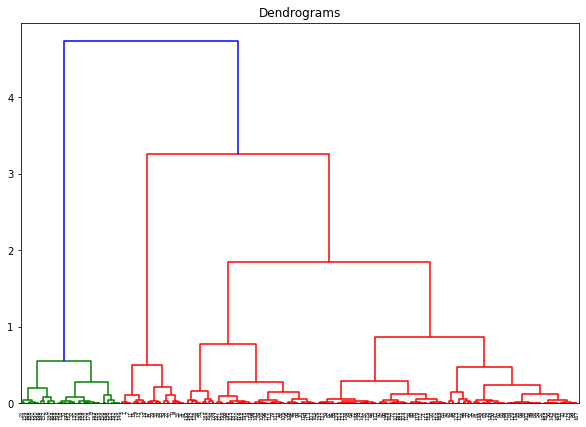

In [29]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = dendrogram(linkage(data, method='ward'))

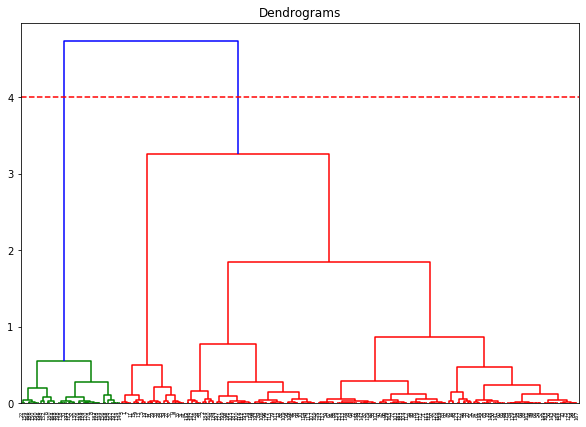

In [33]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = dendrogram(linkage(data, method='ward'))
plt.axhline(y=4, color='r', linestyle='--')
plt.show()

In [139]:
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
cluster.fit(data)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=5,
                        pooling_func='deprecated')

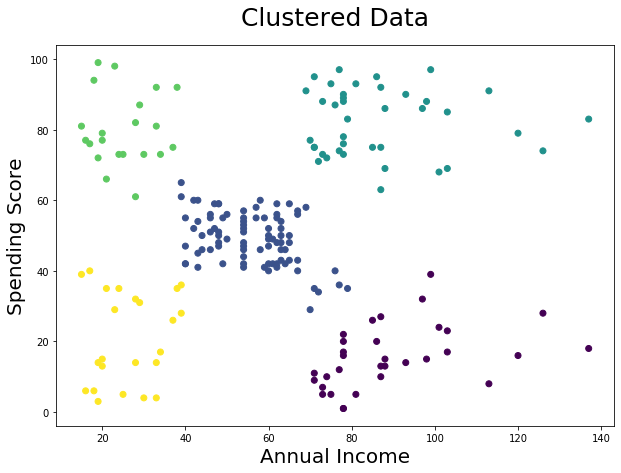

In [140]:
plt.figure(figsize=(10, 7))  
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=cluster.labels_) 
plt.xlabel('Annual Income', fontsize = 20)
plt.ylabel('Spending Score', fontsize = 20)
plt.title('Clustered Data', fontsize = 25, pad = 20)
plt.show()